In [18]:
from sklearn.datasets import make_friedman1

In [19]:
X , Y = make_friedman1(n_samples= 500,
                       n_features= 15,
                       noise = 0.3,
                       random_state=23)

In [20]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve

In [21]:
subsets = ShuffleSplit(n_splits=5, test_size=0.33, random_state=23)

In [22]:
model = DecisionTreeRegressor()

In [23]:
trainScore,testScore = validation_curve(model,X, Y,
                                        param_name='max_depth',
                                        param_range=range(1,11),
                                        cv= subsets, scoring='r2')

In [24]:
meanTrainScore = np.mean(trainScore, axis = 1)
meanTestScore = np.mean(testScore, axis=1)

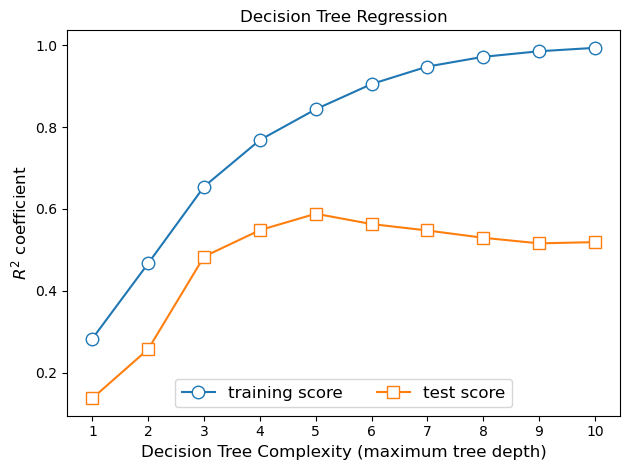

In [25]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(range(1, 11),meanTrainScore, linewidth=1.5, marker='o', markersize=9, mfc='w');
plt.plot(range(1, 11), meanTestScore, linewidth=1.5, marker='s', markersize=9, mfc='w');
plt.legend(['training score', 'test score'], loc='lower center', ncol=2, fontsize=12)
plt.xlabel('Decision Tree Complexity (maximum tree depth)', fontsize=12);
plt.ylabel('$R^2$ coefficient', fontsize=12);
plt.xticks(range(1, 11));
plt.title('Decision Tree Regression')
fig.tight_layout()

SVM


In [26]:
from sklearn.svm import SVR

In [27]:
model = SVR(kernel='rbf', gamma=0.1)

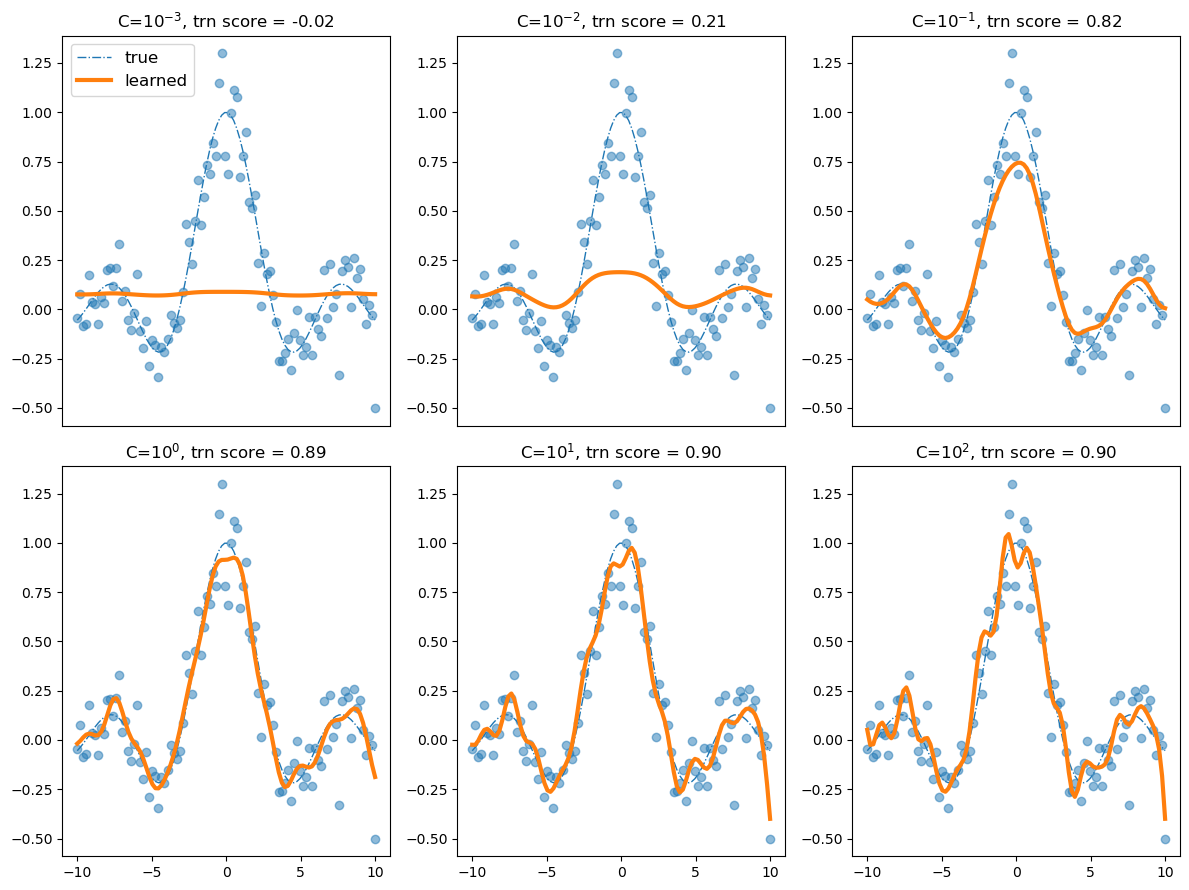

In [28]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import numpy as np


n_syn = 100
X_syn = np.linspace(-10.0, 10.0, n_syn).reshape(-1, 1)
y_true = np.sin(X_syn) / X_syn
y_true = y_true.ravel()
y_syn = y_true + 0.125 * np.random.normal(0.0, 1.0, y_true.shape)
y_syn[-1] = -0.5  # Add one very noisy point to illustrate (exaggeratedly), the impact of overfitting

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 9))
for k, C in enumerate(10.0**np.arange(-3, 3)):
    # Find the correct axis row and column and plot the noisy data and the true function
    i, j = np.divmod(k, 3)
    ax[i, j].scatter(X_syn[:, 0], y_syn, edgecolors=None, alpha=0.5);
    ax[i, j].plot(X_syn[:, 0], y_true, linewidth=1, linestyle='-.', label='true');
    
    # Learn an SVM model for this value of C
    model = SVR(C=C, kernel='rbf', gamma=0.75)
    model.fit(X_syn, y_syn)
    y_pred = model.predict(X_syn)
    
    # Plot the learned SVM model for this value of C
    ax[i, j].plot(X_syn[:, 0], y_pred, linewidth=3, linestyle='-', label='learned');
    
    # Finish up the plots
    trn_score = r2_score(y_syn, y_pred)
    ax[i, j].set_title('C=$10^{{ {0} }}$, trn score = {1:3.2f}'.format(int(np.log10(C)), trn_score))
    
    # Put legend on one plot
    if k == 0:
        handles, labels = ax[i, j].get_legend_handles_labels()
        ax[i, j].legend(handles, labels, loc='upper left', fontsize=12);
        
    if i == 0:
        ax[i, j].set_xticks([])
    
fig.tight_layout()

# plt.savefig('./figures/CH01_F05_Kunapuli.png', format='png', dpi=300, bbox_inches='tight');
# plt.savefig('./figures/CH01_F05_Kunapuli.pdf', format='pdf', dpi=300, bbox_inches='tight');

In [30]:
from sklearn.svm import SVR

model = SVR(kernel='rbf', gamma=0.1)
trn_scores, tst_scores = validation_curve(model, X, Y.ravel(),    
                                          param_name='C',  
                                          param_range=np.logspace(-2, 4, 7), 
                                          cv=subsets, scoring='r2')

mean_train_score = np.mean(trn_scores, axis=1) 
mean_test_score = np.mean(tst_scores, axis=1)  

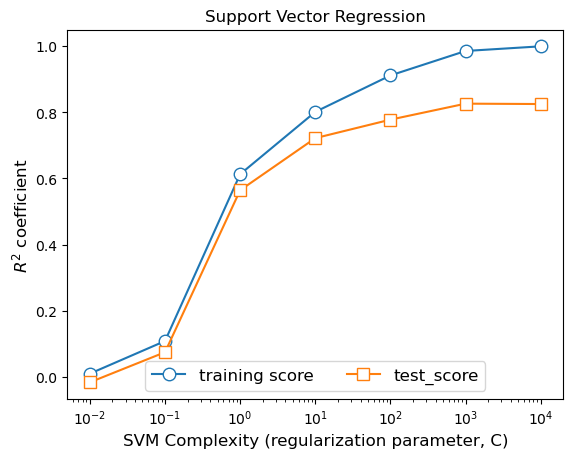

In [31]:
plt.semilogx(np.logspace(-2, 4, 7), mean_train_score, linewidth=1.5, marker='o', markersize=9, mfc='w');
plt.semilogx(np.logspace(-2, 4, 7), mean_test_score, linewidth=1.5, marker='s', markersize=9, mfc='w');
plt.legend(['training score', 'test_score'], loc='lower center', ncol=2, fontsize=12);
plt.xlabel('SVM Complexity (regularization parameter, C)', fontsize=12);
plt.ylabel('$R^2$ coefficient', fontsize=12);
plt.title('Support Vector Regression', fontsize=12)
fig.tight_layout()